### Importación de datos



In [8]:
#Cargar y manipular datos CSV con la biblioteca Pandas

import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación (Ingreso total por tienda)




In [22]:
from urllib.request import urlopen
import csv

urls = [url, url2, url3, url4]

# Función para leer un CSV desde URL
def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        lector = csv.DictReader(lineas)
        for fila in lector:
            datos.append(fila)
    return datos

# Análisis de facturación
total_facturacion = 0

for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    facturacion_tienda = 0

    for venta in datos_tienda:
        precio = float(venta['Precio'])  # Solo sumamos el precio
        facturacion_tienda += precio

    print(f"Facturación Tienda {i+1}: ${facturacion_tienda:.2f}")
    total_facturacion += facturacion_tienda

# Mostrar facturación total
print(f"\nFacturación total de todas las tiendas: ${total_facturacion:.2f}")


Facturación Tienda 1: $1150880400.00
Facturación Tienda 2: $1116343500.00
Facturación Tienda 3: $1098019600.00
Facturación Tienda 4: $1038375700.00

Facturación total de todas las tiendas: $4403619200.00


NameError: name 'bars' is not defined

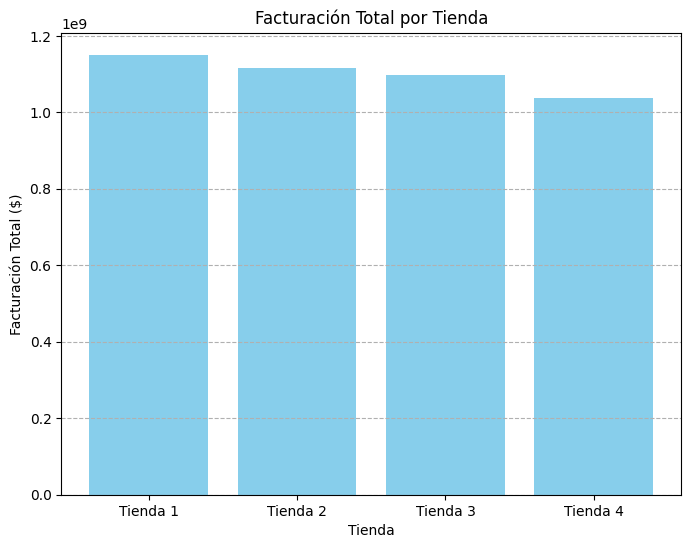

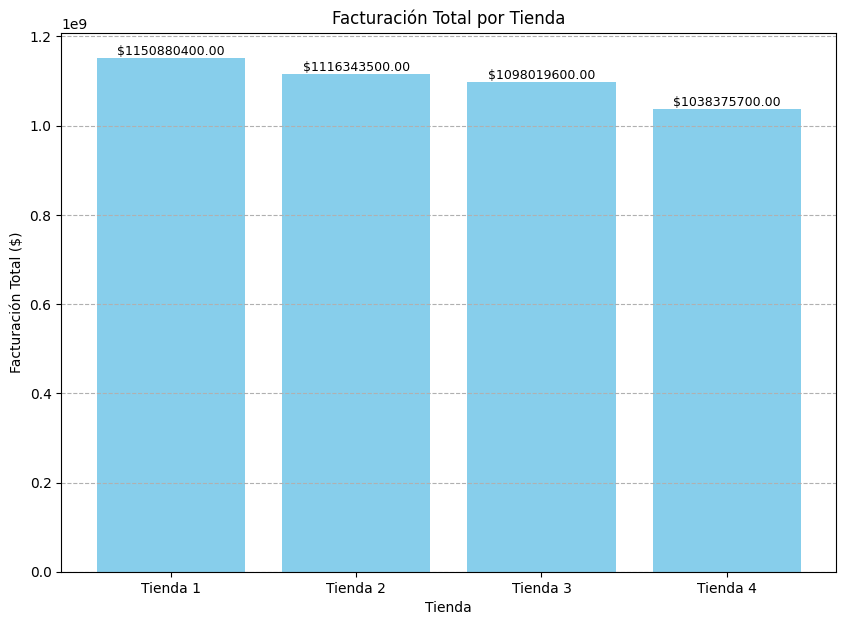

In [34]:
import matplotlib.pyplot as plt

# ... (Tu código para leer los CSV y calcular facturación_tienda)

# Aquí almacenarás la facturación por tienda
facturacion_por_tienda = {}

for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    facturacion_tienda = 0

    for venta in datos_tienda:
        precio = float(venta['Precio'])
        facturacion_tienda += precio

    # Almacena el resultado con un nombre descriptivo para la tienda
    facturacion_por_tienda[f"Tienda {i+1}"] = facturacion_tienda

# Prepara los datos para el gráfico
tiendas = list(facturacion_por_tienda.keys())
facturacion = list(facturacion_por_tienda.values())

# Crea el gráfico de barras
plt.figure(figsize=(10, 7)) # Define un tamaño adecuado
bars = plt.bar(tiendas, facturacion, color='skyblue') # Almacena los objetos de las barras

plt.xlabel('Tienda') # Etiqueta del eje X
plt.ylabel('Facturación Total ($)') # Etiqueta del eje Y
plt.title('Facturación Total por Tienda') # Título del gráfico
plt.grid(axis='y', linestyle='--') # Agrega una cuadrícula en el eje Y

# Agregar las etiquetas de texto a cada barra
for bar in bars:
    yval = bar.get_height() # Obtiene la altura de la barra (el valor de facturación)
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, f'${yval:.2f}', ha='center', va='bottom', fontsize=9)
    # bar.get_x() + bar.get_width()/2: posiciona el texto en el centro horizontal de la barra
    # yval + 100: posiciona el texto ligeramente por encima de la barra (ajusta el 100 si es necesario)
    # f'${yval:.2f}': formato del texto (valor de la facturación con 2 decimales y símbolo $)
    # ha='center', va='bottom': alineación del texto

plt.show() # Muestra el gráfico

# 2. Ventas por categoría

In [35]:
prod_vendidos_tienda1 = tienda['Categoría del Producto'].value_counts()
prod_vendidos_tienda2 = tienda2['Categoría del Producto'].value_counts()
prod_vendidos_tienda3 = tienda3['Categoría del Producto'].value_counts()
prod_vendidos_tienda4 = tienda4['Categoría del Producto'].value_counts()

print("Ventas por categoría en la tienda 1:")
print(prod_vendidos_tienda1)
print("\nVentas por categoría en la tienda 2:")
print(prod_vendidos_tienda2)
print("\nVentas por categoría en la tienda 3:")
print(prod_vendidos_tienda3)
print("\nVentas por categoría en la tienda 4:")
print(prod_vendidos_tienda4)


Ventas por categoría en la tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Ventas por categoría en la tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Ventas por categoría en la tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: in

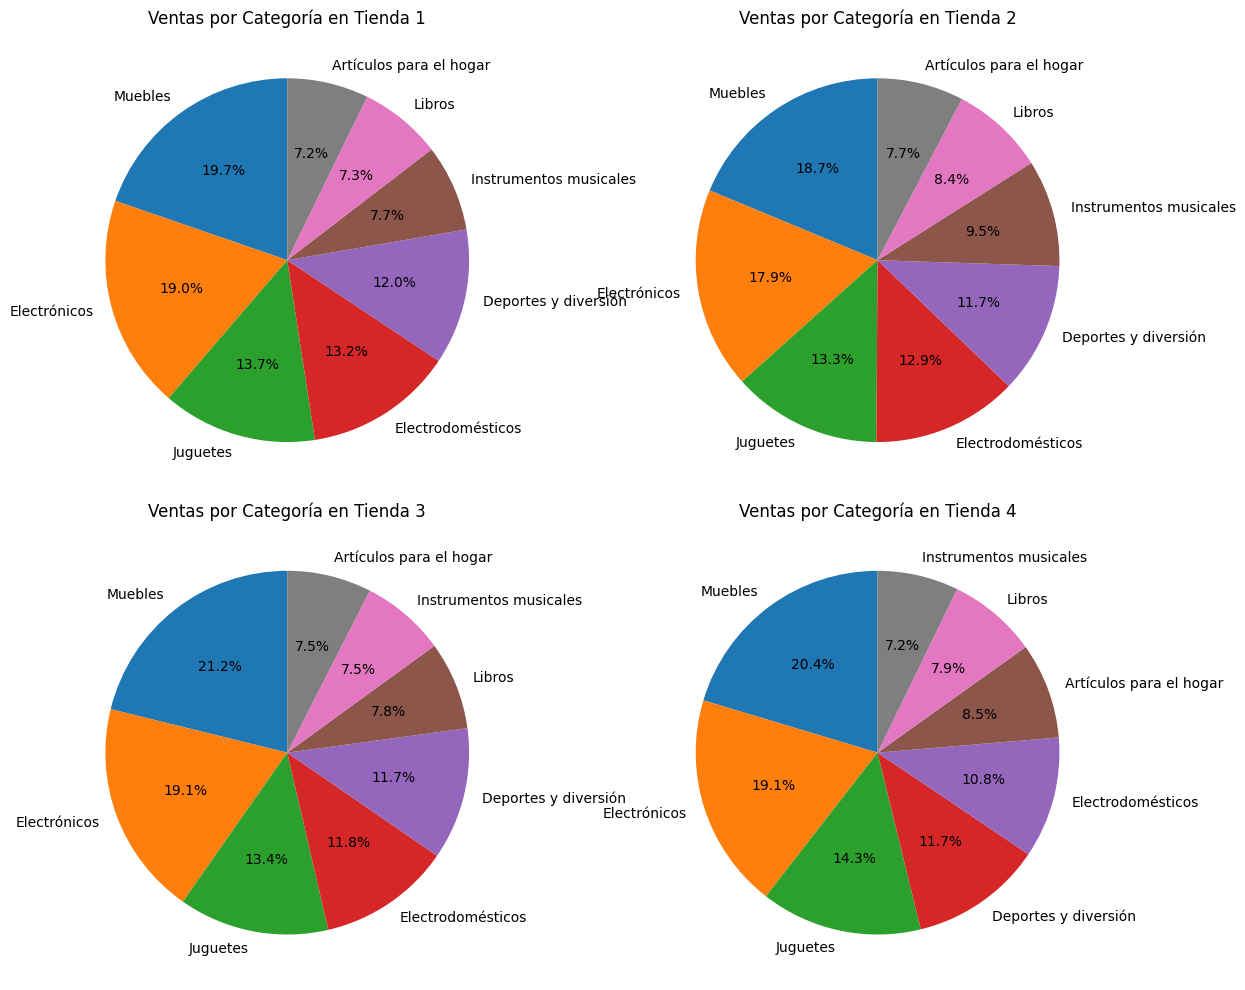

In [36]:
import matplotlib.pyplot as plt

# ... (Tu código para cargar los datos y calcular prod_vendidos_tiendaX)

prod_vendidos_tienda1 = tienda['Categoría del Producto'].value_counts()
prod_vendidos_tienda2 = tienda2['Categoría del Producto'].value_counts()
prod_vendidos_tienda3 = tienda3['Categoría del Producto'].value_counts()
prod_vendidos_tienda4 = tienda4['Categoría del Producto'].value_counts()


# Crea una figura y 4 subtramas (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(12, 10)) # Ajusta el tamaño según necesites

# Aplanar la matriz de ejes para facilitar la iteración
axes = axes.flatten()

# Datos de ventas por categoría para cada tienda
datos_tiendas = [
    (prod_vendidos_tienda1, "Tienda 1"),
    (prod_vendidos_tienda2, "Tienda 2"),
    (prod_vendidos_tienda3, "Tienda 3"),
    (prod_vendidos_tienda4, "Tienda 4")
]

# Generar un gráfico de pie para cada tienda en su respectiva subtrama
for i, (datos_ventas, titulo_tienda) in enumerate(datos_tiendas):
    ax = axes[i] # Selecciona el eje actual

    datos_ventas.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Ventas por Categoría en {titulo_tienda}')
    ax.set_ylabel('') # Elimina la etiqueta 'Categoría del Producto' del eje Y

# Ajusta el espacio entre los subgráficos para evitar que se superpongan
plt.tight_layout()

# Muestra los gráficos
plt.show()

# 3. Calificación promedio de la tienda


In [37]:
import pandas as pd

urls = [url, url2, url3, url4]
tiendas = [pd.read_csv(url) for url in urls]

tienda2 = pd.DataFrame(tienda2)
tienda3 = pd.DataFrame(tienda3)
tienda4 = pd.DataFrame(tienda4)

calif_tienda1 = tienda['Calificación'].mean()
calif_tienda2 = tienda2['Calificación'].mean()
calif_tienda3 = tienda3['Calificación'].mean()
calif_tienda4 = tienda4['Calificación'].mean()

print(f"La calificación promedio de la tienda 1 es: {calif_tienda1:.2f}")
print(f"La calificación promedio de la tienda 2 es: {calif_tienda2:.2f}")
print(f"La calificación promedio de la tienda 3 es: {calif_tienda3:.2f}")
print(f"La calificación promedio de la tienda 4 es: {calif_tienda4:.2f}")


La calificación promedio de la tienda 1 es: 3.98
La calificación promedio de la tienda 2 es: 4.04
La calificación promedio de la tienda 3 es: 4.05
La calificación promedio de la tienda 4 es: 4.00


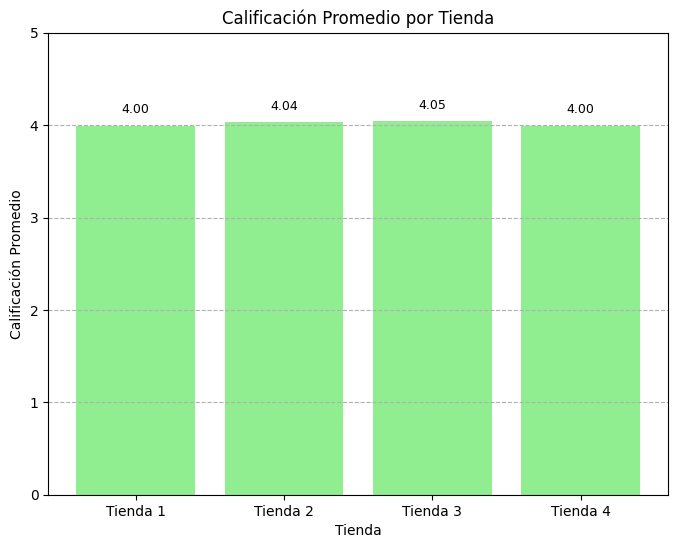

In [38]:
import matplotlib.pyplot as plt
import pandas as pd # Asegúrate de tener pandas importado

urls = [url, url2, url3, url4] # Asegúrate de que 'urls' esté definido
tiendas_df = [pd.read_csv(url) for url in urls] # Leer los DataFrames nuevamente si es necesario

# Calcular calificaciones promedio
calif_tienda1 = tiendas_df[0]['Calificación'].mean()
calif_tienda2 = tiendas_df[1]['Calificación'].mean()
calif_tienda3 = tiendas_df[2]['Calificación'].mean()
calif_tienda4 = tiendas_df[3]['Calificación'].mean()


# Prepara los datos para el gráfico
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
calificaciones_promedio = [calif_tienda1, calif_tienda2, calif_tienda3, calif_tienda4]

# Crea el gráfico de barras
plt.figure(figsize=(8, 6)) # Define un tamaño adecuado
plt.bar(tiendas, calificaciones_promedio, color='lightgreen') # Crea las barras
plt.xlabel('Tienda') # Etiqueta del eje X
plt.ylabel('Calificación Promedio') # Etiqueta del eje Y
plt.title('Calificación Promedio por Tienda') # Título del gráfico
plt.ylim(0, 5) # Establece el límite del eje Y de 0 a 5 (típico para calificaciones)
plt.grid(axis='y', linestyle='--') # Agrega una cuadrícula en el eje Y

# Agregar las etiquetas de texto a cada barra (opcional, similar al ejemplo anterior)
for i, calif in enumerate(calificaciones_promedio):
    plt.text(i, calif + 0.1, f'{calif:.2f}', ha='center', va='bottom', fontsize=9)
    # i es la posición de la barra en el eje x
    # calif + 0.1 ajusta la posición vertical del texto ligeramente por encima de la barra

plt.show() # Muestra el gráfico

# 4. Productos más y menos vendidos

In [ ]:
def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        lector = csv.DictReader(lineas)
        for fila in lector:
            datos.append(fila)
    return datos

# Función para calcular Top 3 más y menos dinero generado
def top_productos(datos_tienda, tienda_numero):
    ingreso_por_producto = defaultdict(float)

    for venta in datos_tienda:
        producto = venta['Producto']
        precio = float(venta['Precio'])
        # Ahora solo usamos el precio (no multiplicamos por cantidad de cuotas)
        ingreso_por_producto[producto] += precio

    # Convertimos a lista ordenada
    productos_ordenados = sorted(ingreso_por_producto.items(), key=lambda x: x[1], reverse=True)

    top_mas_vendidos = productos_ordenados[:3]
    top_menos_vendidos = productos_ordenados[-3:]

    print(f"\nTienda {tienda_numero} - TOP 3 productos que MÁS dinero generaron:")
    for producto, ingreso in top_mas_vendidos:
        print(f"  {producto} - Ingresos: ${ingreso:.2f}")

    print(f"\nTienda {tienda_numero} - TOP 3 productos que MENOS dinero generaron:")
    for producto, ingreso in top_menos_vendidos:
        print(f"  {producto} - Ingresos: ${ingreso:.2f}")

# Recorrer todas las tiendas
for i, url in enumerate(urls, start=1):
    datos_tienda = leer_csv(url)
    top_productos(datos_tienda, i)


Tienda 1 - TOP 3 productos que MÁS dinero generaron:
  TV LED UHD 4K - Ingresos: $142150200.00
  Refrigerador - Ingresos: $112143300.00
  Iphone 15 - Ingresos: $97902200.00

Tienda 1 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $696900.00
  Dinosaurio Rex - Ingresos: $688900.00
  Cuerda para saltar - Ingresos: $652800.00

Tienda 2 - TOP 3 productos que MÁS dinero generaron:
  Iphone 15 - Ingresos: $113225800.00
  TV LED UHD 4K - Ingresos: $103375000.00
  Refrigerador - Ingresos: $97632500.00

Tienda 2 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $856900.00
  Dinosaurio Rex - Ingresos: $770300.00
  Cubo mágico 8x8 - Ingresos: $643600.00

Tienda 3 - TOP 3 productos que MÁS dinero generaron:
  Refrigerador - Ingresos: $99889700.00
  TV LED UHD 4K - Ingresos: $96669100.00
  Iphone 15 - Ingresos: $93225700.00

Tienda 3 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $853800.00
  Dinosaurio Rex -

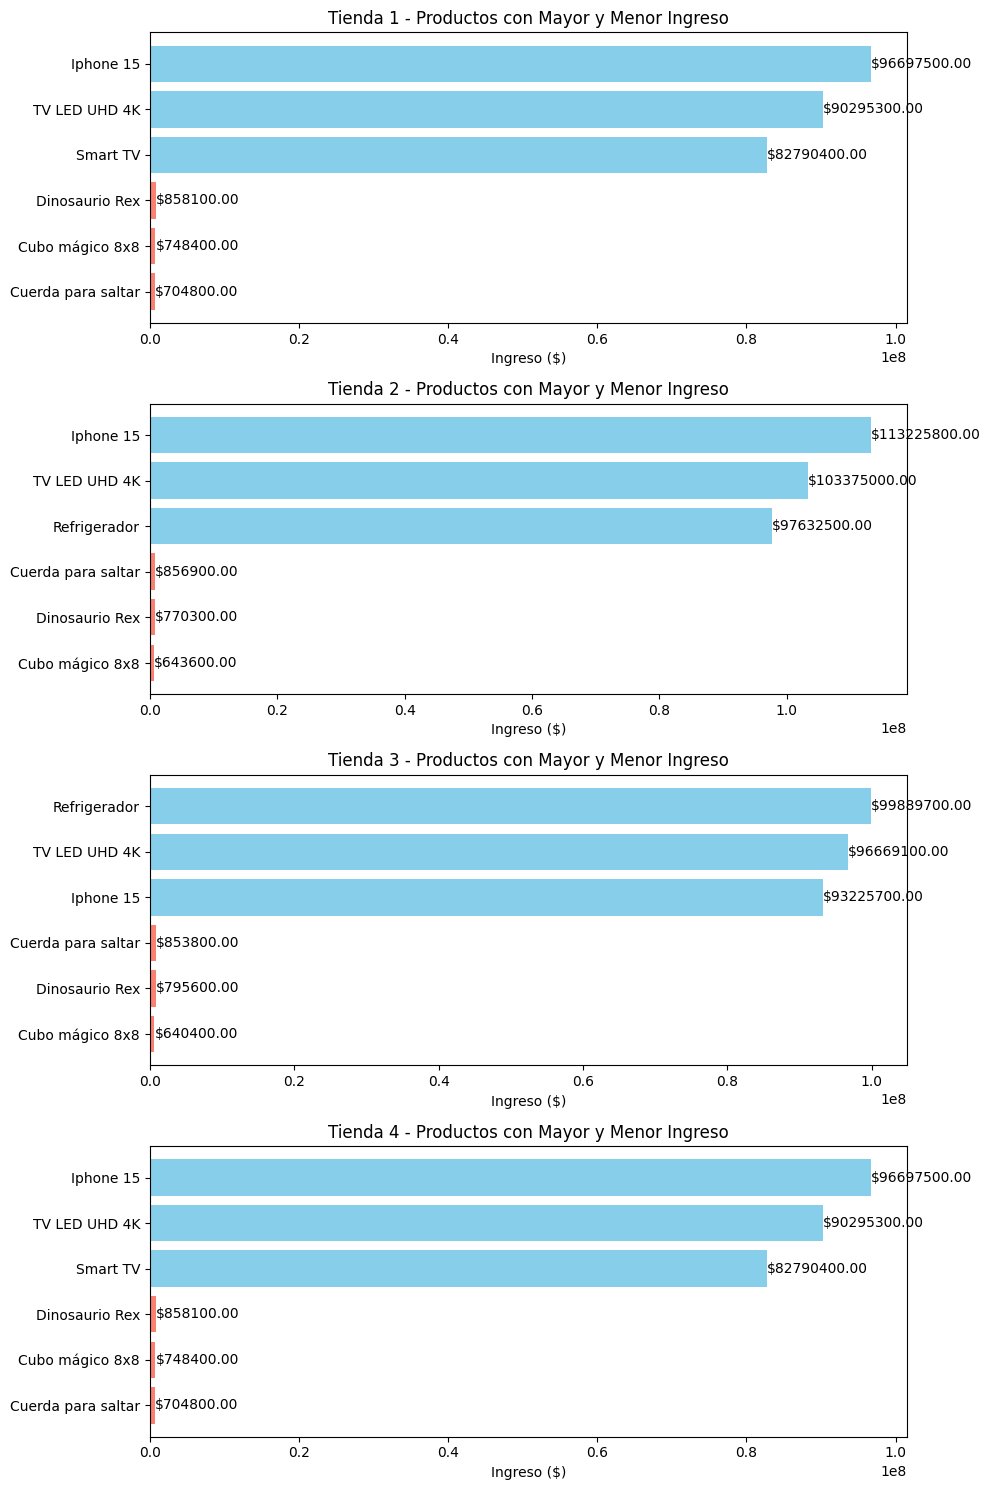

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
from urllib.request import urlopen
import csv # Asegúrate de importar csv

urls = [url, url2, url3, url4] # Asegúrate de que 'urls' esté definido

# Función para leer un CSV desde URL (reutilizando tu función)
def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        lector = csv.DictReader(lineas)
        for fila in lector:
            datos.append(fila)
    return datos

# Diccionario para almacenar top/bottom productos por tienda
resultados_por_tienda = {}

for i, url in enumerate(urls, start=1):
    datos_tienda = leer_csv(url)
    ingreso_por_producto = defaultdict(float)

    for venta in datos_tienda:
        producto = venta['Producto']
        precio = float(venta['Precio'])
        ingreso_por_producto[producto] += precio

    # Convertimos a lista ordenada por ingreso
    productos_ordenados = sorted(ingreso_por_producto.items(), key=lambda x: x[1], reverse=True)

    top_mas_vendidos = productos_ordenados[:3]
    top_menos_vendidos = productos_ordenados[-3:]

    resultados_por_tienda[f"Tienda {i}"] = {
        'mas_vendidos': top_mas_vendidos,
        'menos_vendidos': top_menos_vendidos
    }

# Ahora, graficamos
fig, axes = plt.subplots(4, 1, figsize=(10, 15)) # 4 filas (por tienda), 1 columna
axes = axes.flatten() # Aplanar para iterar fácilmente

for i, (tienda_nombre, resultados) in enumerate(resultados_por_tienda.items()):
    mas_vendidos = resultados['mas_vendidos']
    menos_vendidos = resultados['menos_vendidos']

    # Combinar los datos para el gráfico
    productos_combinados = [item[0] for item in mas_vendidos] + [item[0] for item in menos_vendidos]
    ingresos_combinados = [item[1] for item in mas_vendidos] + [item[1] for item in menos_vendidos]

    # Selecciona el eje actual para la tienda
    ax = axes[i]

    # Crea el gráfico de barras horizontal
    bars = ax.barh(productos_combinados, ingresos_combinados, color=['skyblue'] * 3 + ['salmon'] * 3) # Colores diferenciados
    ax.set_title(f'{tienda_nombre} - Productos con Mayor y Menor Ingreso')
    ax.set_xlabel('Ingreso ($)')
    # ax.set_ylabel('Producto') # Opcional, ya que los nombres están en las barras
    ax.invert_yaxis() # Invierte el eje Y para que los productos con mayor ingreso estén arriba

    # Agregar etiquetas a las barras
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 50, bar.get_y() + bar.get_height()/2, f'${width:.2f}', va='center')


plt.tight_layout() # Ajusta el espacio entre los subgráficos
plt.show()

# 5. Envío promedio por tienda

In [57]:
import pandas as pd

tiendas = [pd.read_csv(url) for url in urls]
tienda1 = tiendas[0]
tienda2 = tiendas[1]
tienda3 = tiendas[2]
tienda4 = tiendas[3]

costo_envio_tienda1 = tienda1['Costo de envío'].mean()
costo_envio_tienda2 = tienda2['Costo de envío'].mean()
costo_envio_tienda3 = tienda3['Costo de envío'].mean()
costo_envio_tienda4 = tienda4['Costo de envío'].mean()

print(f"El costo de envío promedio de la tienda 1 es: {costo_envio_tienda1:.2f}")
print(f"El costo de envío promedio de la tienda 2 es: {costo_envio_tienda2:.2f}")
print(f"El costo de envío promedio de la tienda 3 es: {costo_envio_tienda3:.2f}")
print(f"El costo de envío promedio de la tienda 4 es: {costo_envio_tienda4:.2f}")

El costo de envío promedio de la tienda 1 es: 25216.24
El costo de envío promedio de la tienda 2 es: 25216.24
El costo de envío promedio de la tienda 3 es: 24805.68
El costo de envío promedio de la tienda 4 es: 23459.46


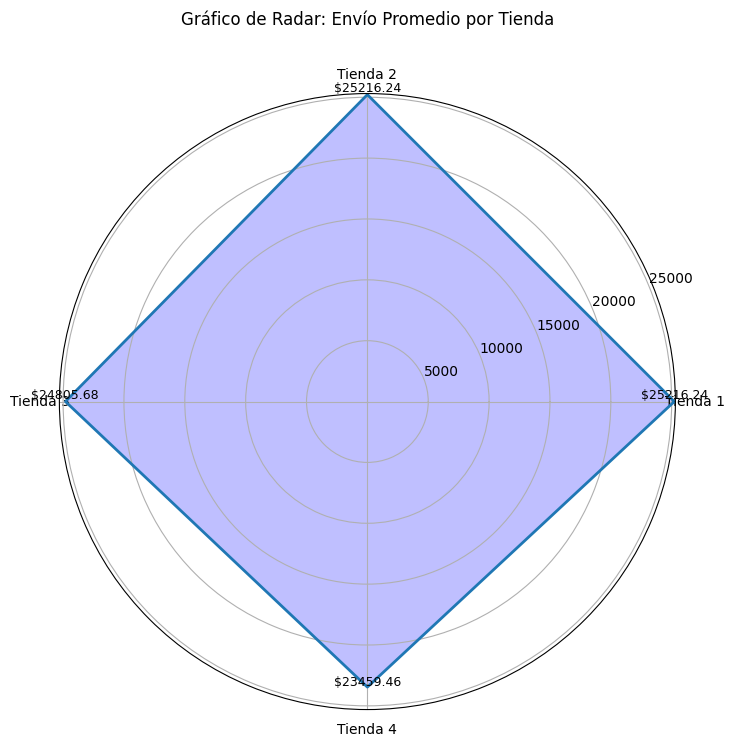

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from urllib.request import urlopen
import csv

urls = [url, url2, url3, url4]

# Función para leer un CSV desde URL
def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        lector = csv.DictReader(lineas)
        for fila in lector:
            datos.append(fila)
    return datos

# Calcular envíos promedio y almacenarlos
envios_promedio = []
nombres_tiendas = []

for i, url in enumerate(urls, start=1):
    datos_tienda = leer_csv(url)
    costos_envio = []

    for venta in datos_tienda:
        costo_envio = float(venta['Costo de envío'])
        costos_envio.append(costo_envio)

    promedio_envio = sum(costos_envio) / len(costos_envio) if costos_envio else 0
    envios_promedio.append(promedio_envio)
    nombres_tiendas.append(f'Tienda {i}')

# --- Configuración para el Gráfico de Radar ---

num_vars = len(nombres_tiendas)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Para que el gráfico se cierre, repetimos el primer valor y ángulo
envios_promedio_cerrado = envios_promedio + [envios_promedio[0]]
angles_cerrado = angles + [angles[0]]

# --- Crear el Gráfico de Radar ---

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.plot(angles_cerrado, envios_promedio_cerrado, linewidth=2, linestyle='solid', label='Envío Promedio')
ax.fill(angles_cerrado, envios_promedio_cerrado, 'blue', alpha=0.25)

# Configurar las etiquetas de los ejes (nombres de las tiendas)
ax.set_thetagrids(np.degrees(angles), nombres_tiendas)

# Añadir etiquetas de valor a los puntos
# Iteramos sobre los ángulos y los valores de envío promedio
for angle, envio in zip(angles, envios_promedio):
    # ax.text(angle, radius, text, **kwargs)
    # angle: Posición angular en radianes
    # radius: Posición radial (distancia desde el centro). Ajustamos ligeramente para que no se superponga.
    ax.text(angle, envio + 50, f'${envio:.2f}', ha='center', va='bottom', fontsize=9) # Ajusta 50 según necesites espacio

# Añadir título
ax.set_title('Gráfico de Radar: Envío Promedio por Tienda', y=1.1)

# Opcional: Ajustar los límites del eje radial si es necesario
# ax.set_ylim(0, max(envios_promedio) * 1.2) # Ajusta el límite máximo

plt.show()

**Conclusiones**

1. La tienda número 4 es la que genera menos ingresos. Podríamos afirmar que en base al monto de ventas esta sería la tienda que podría vender el sr. Juan. Mientras que la tienda 1 es la que genera el mayor ingreso en ventas.
2. Sin embargo en la puntuación por clientes, la tienda número cuatro está en la media, no es ni la peor ni la mejor evaluada. Tenemos 2 valores contradicotrios que sería bueno asignarles un peso.
3. En base a las cinco variables analizadas sería precipitado esciondir de la tienda número 4. COnsidero que un mayor análisis y definición de criterios claros son necesarios para tomar la decisión de vender una de la tiendas.

